In [1]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#update_time: the date seperate traing set and testing set
update_time='2020-4-05'

df=pd.read_csv('covid_19_clean_complete.csv')
df['Date']=df.Date.apply(lambda x:x+'20')
df['Date']=pd.to_datetime(df['Date'], format="%m/%d/%Y")
#df=df[df['Date']> pd.to_datetime('2020-02-28')]
update=df[df['Date']> pd.to_datetime(update_time)]
df=df[df['Date']<=pd.to_datetime(update_time)]

#model are trained start 2020/3/28
USA=df[df['Country/Region']=='US'].reset_index()
Spain=df[df['Country/Region']=='Spain'].reset_index()
Germany=df[df['Country/Region']=='Germany'].reset_index()
Italy=df[df['Country/Region']=='Italy'].reset_index()
Canada=df[df['Country/Region']=='Canada'].groupby('Date').sum().reset_index()
Canada['Country/Region']='Canada'
Canada_detail=df[df['Country/Region']=='Canada'].groupby(['Province/State','Date']).sum().reset_index()


In [2]:
US_new=update[update['Country/Region']=='US'].set_index('Date')
Spain_new=update[update['Country/Region']=='Spain'].set_index('Date')
Italy_new=update[update['Country/Region']=='Italy'].set_index('Date')
Germany_new=update[update['Country/Region']=='Germany'].set_index('Date')
Canada_new=update[update['Country/Region']=='Canada'].groupby('Date').sum().reset_index().set_index('Date')
Canada_new['Country/Region']='Canada'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


,Germany_prediction,Actually
Date,,
2020-04-05,104262.068948,NaN
2020-04-06,108454.237898,103374.0
2020-04-07,112702.498314,107663.0
2020-04-08,117006.687399,113296.0
2020-04-09,121366.814011,118181.0
2020-04-10,125782.877668,122171.0
2020-04-11,130254.878398,124908.0
2020-04-12,134782.816197,127854.0
2020-04-13,139366.691067,NaN


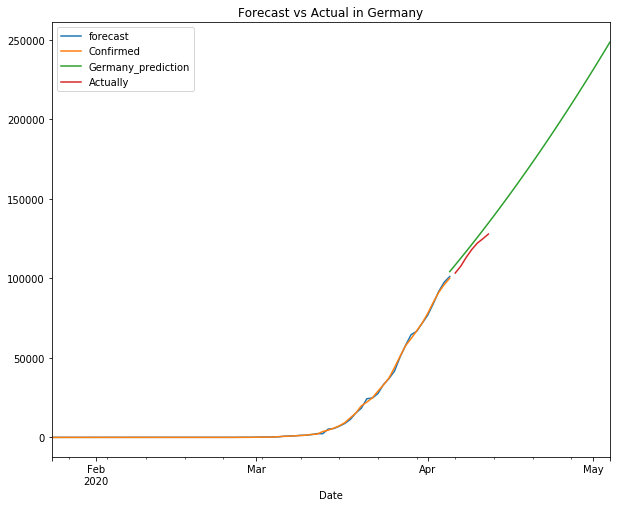

In [3]:
from pandas import datetime
def arima_predict(data,update):
    country=data['Country/Region'][0]
    confirm_cs = data
        
    arima_data = confirm_cs[['Date','Confirmed']]
    arima_data=arima_data.set_index('Date')
    #print(arima_data)
    model = ARIMA(arima_data['Confirmed'], order=(1, 2, 0))
    fit_model = model.fit(trend='c', full_output=True, disp=True,transparams=False)
    #print(fit_model.summary())
    fig, ax = plt.subplots(figsize=(10,8))
    fig=fit_model.plot_predict(ax=ax)
    fig.show()
    plt.title('Forecast vs Actual in '+country)
    #pd.DataFrame(fit_model.resid).plot()
    forecast = fit_model.forecast(steps=30)[0]
    
  
    date=pd.date_range(start='2020-04-05',periods=30)
    pr=pd.DataFrame(columns=['Date',country+'_prediction'])
    pr['Date']=date
    pr[country+'_prediction']=forecast
    pr=pr.set_index('Date')
    pr['Actually']=update['Confirmed']
    pr.plot(ax=ax)
                
    
    return pr
us_prediction=arima_predict(Germany,Germany_new)
us_prediction

In [4]:
pre=us_prediction.dropna()
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(pre[pre.columns[0]],pre[pre.columns[1]])
mse

23538176.432075884